NOTE: jump straight ahead to the custom method, sigma clipping is not used.

In this file, we develop a method to find the peaks that does not depend on the intensity of the y-axis. That is, we develop a method that does not use a threshold.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sigmaclip
from utility.utility import peak_detect

In [197]:
a = np.concatenate((np.linspace(9.5,10.5,31), np.linspace(0,20,5)))
a

array([ 9.5       ,  9.53333333,  9.56666667,  9.6       ,  9.63333333,
        9.66666667,  9.7       ,  9.73333333,  9.76666667,  9.8       ,
        9.83333333,  9.86666667,  9.9       ,  9.93333333,  9.96666667,
       10.        , 10.03333333, 10.06666667, 10.1       , 10.13333333,
       10.16666667, 10.2       , 10.23333333, 10.26666667, 10.3       ,
       10.33333333, 10.36666667, 10.4       , 10.43333333, 10.46666667,
       10.5       ,  0.        ,  5.        , 10.        , 15.        ,
       20.        ])

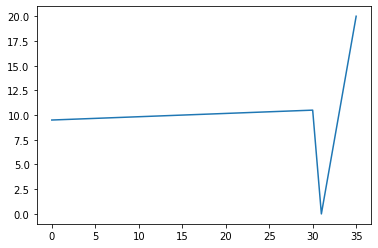

In [198]:
plt.plot(a)

In [199]:
fact = 1.5

Iterative sigma-clipping of array elements.

The output array contains only those elements of the input array c that satisfy the conditions

mean(c) - std(c)*low < c < mean(c) + std(c)*high



In [200]:
print( a.mean(),
a.std() )

10.0 2.6497146363940756


In [201]:
c, low, upp = sigmaclip(a, fact, fact)
c

array([ 9.96666667, 10.        , 10.03333333, 10.        ])

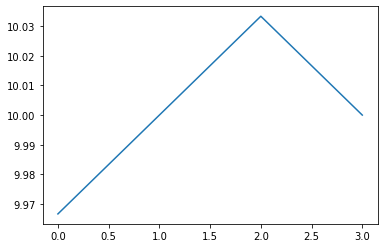

In [202]:
plt.plot(c)

But we basically need the opposite behavior of this sigma clipping, which we can easily create ourselves.

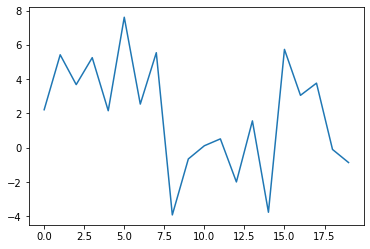

In [203]:
random_sample = np.array(np.random.normal(loc=0, scale=3, size=20))
#random_sample = np.array([ 4.60555747, -0.94268943, -1.28941562,  0.40409242,  2.07676006,  2.44004877,
 #-1.53734228, -2.30102803,  4.49242054,  2.47501499] )
plt.plot(random_sample)

In [205]:
print( [i for i,_ in enumerate(random_sample) ] )
peaks = peak_detect(random_sample, 0.2)
peaks

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


array([ 1,  2,  3,  5,  7, 15, 16, 17])

In [206]:
peak_heights = [random_sample[i]  for i in peak_detect(random_sample, 0.2)]
peak_heights

[5.423819955245837,
 3.683471506251218,
 5.25470549317917,
 7.611798408376059,
 5.543890927070407,
 5.737375925550573,
 3.0587216366047674,
 3.768934388944716]

In [207]:
print( random_sample )
print( random_sample[peak_detect(random_sample,0.2)] )

[ 2.21845625  5.42381996  3.68347151  5.25470549  2.16047074  7.61179841
  2.54865921  5.54389093 -3.91493324 -0.65054129  0.11863825  0.51940897
 -1.991755    1.56854098 -3.75952163  5.73737593  3.05872164  3.76893439
 -0.09779238 -0.86039151]
[5.42381996 3.68347151 5.25470549 7.61179841 5.54389093 5.73737593
 3.05872164 3.76893439]


In [208]:
peaks

array([ 1,  2,  3,  5,  7, 15, 16, 17])

In [209]:
x = np.array( range(len(random_sample)) )
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

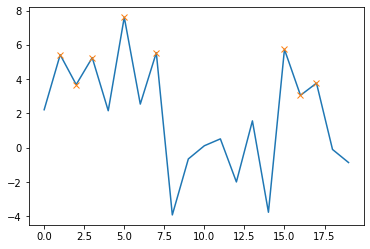

In [210]:
plt.plot(x, random_sample,'-', x[peaks], peak_heights,'x')